<a href="https://colab.research.google.com/github/RuslanMavlitov/IDE/blob/master/%D0%A1%D0%BD%D0%B8%D0%B6%D0%B5%D0%BD%D0%B8%D0%B5_%D1%80%D0%B0%D0%B7%D0%BC%D0%B5%D1%80%D0%BD%D0%BE%D1%81%D1%82%D0%B8_%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D0%BA%D0%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD
from sklearn.manifold import TSNE
from sklearn import metrics

In [2]:
df = pd.read_csv('/content/sample_data/Country-data.zip')
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


country — название страны;

child_mort — показатель смертности детей до 5 лет;

exports — показатель экспорта на душу населения;

health — показатель затрат на здравоохранение на душу населения;

imports — показатель импорта на душу населения;

Income — средний доход на душу населения;

Inflation — годовой показатель инфляции;

life_expec — средняя продолжительность жизни;

total_fer — суммарный коэффициент рождаемости;

gdpp — значение ВВП на душу населения.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


##Задание 7.1

Какова максимальная продолжительность жизни? Ответ округлите до одного знака после точки-разделителя.

In [3]:
df['life_expec'].max()

82.8

##Задание 7.2

Чтобы получить более качественные результаты, необходимо стандартизировать данные. Используйте для этого StandardScaler. Примените его ко всем значениям признаков и впишите в качестве ответа значение первого признака для первого объекта (таким образом можно будет проверить, что вы всё сделали корректно). Ответ округлите до двух знаков после точки-разделителя.

In [11]:
X = df.drop('country',axis =1)  
y = df['country']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
round(X_scaled[0][0], 2)

1.29

##Задание 7.3

Как вы помните, нет смысла использовать сильно связанные друг с другом признаки, так как их можно преобразовать в один и таким образом уменьшить общее количество признаков. Давайте выясним, есть ли в данных такие признаки.

Постройте матрицу корреляций для всех признаков. Найдите максимальный коэффициент корреляции. Запишите его в качестве ответа, предварительно округлив до двух знаков после точки-разделителя.

In [18]:
round(df.corr().min().min(), 2)

-0.89

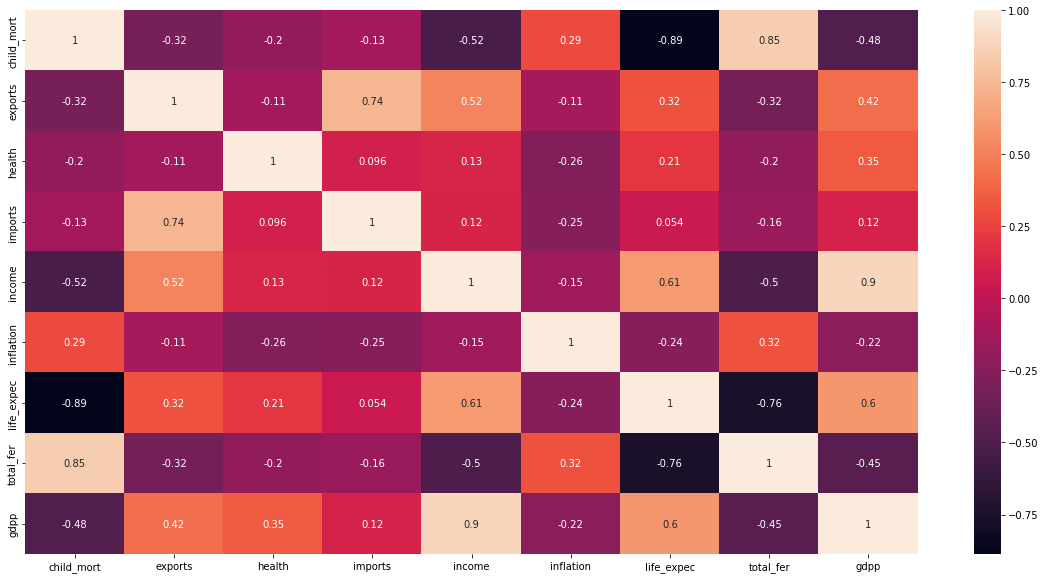

In [15]:
plt.figure(figsize = (20,10))       
sns.heatmap(df.corr(),annot = True);

##Задание 7.4

Теперь понизим размерность данных — возьмём для этого метод главных компонент (PCA) как самый простой и популярный.

Найдите минимальное число компонент, которые суммарно могут объяснить как минимум 90 % разброса данных.

In [28]:
pca = PCA(n_components=0.9, random_state=42).fit(X_scaled)

len(pca.components_)

5

##Задание 7.5

Оставьте только главные компоненты, выделенные в предыдущем задании. Какую долю дисперсии объясняет первая главная компонента? Ответ округлите до двух знаков после точки-разделителя.

In [26]:
round(pca.explained_variance_ratio_[0], 2)

0.46

##Задание 7.6

Как вы помните, при создании компонент с помощью PCA они должны получиться независимыми, то есть мы не должны теперь наблюдать высоких коэффициентов корреляции.

Постройте матрицу корреляций. Сколько значений в ней превышают \(0.001\), не считая единичных значений на главной диагонали?

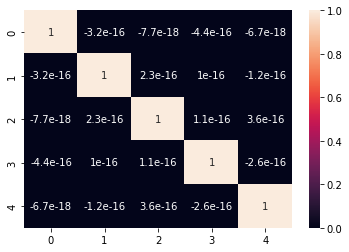

In [34]:
corrmat = np.corrcoef(pca.transpose())
sns.heatmap(corrmat, annot=True);

##Задание 7.7

Теперь, когда мы уменьшили размерность данных, можно переходить к кластеризации. Подберите оптимальное количество кластеров с помощью коэффициента силуэта, перебирая возможные значения от 2 до 10 включительно. Для кластеризации используйте алгоритм k-means++. В качестве значения параметра random_state возьмите число 1.

Судя по полученным результатам, сколько кластеров лучше всего взять?

2 0.30441994992318194
3 0.3079769786519017
4 0.3219583760049839
5 0.24979547358010445
6 0.2557148132818498
7 0.2758360485001676
8 0.26830308166768574
9 0.2646173587562107
10 0.243309501776668


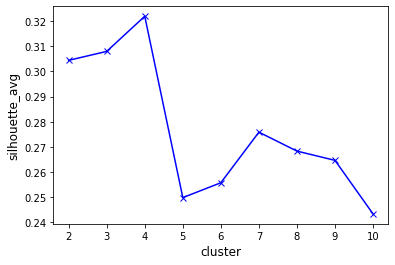

In [38]:
silhouette_avgs = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state = 1)
    kmeans.fit(pca)
    cluster_labels = kmeans.labels_
    silhouette_avg = metrics.silhouette_score(pca, cluster_labels)
    silhouette_avgs.append(silhouette_avg)
    print(i, silhouette_avg)

plt.xlabel("cluster", fontsize=12)
plt.ylabel("silhouette_avg", fontsize=12)
plt.plot([i for i in range(2, 11)], silhouette_avgs, 'xb-');

##Задание 7.8


Теперь, когда оптимальное количество кластеров выбрано, реализуйте алгоритм k-means с этим параметром. В качестве значения random_state возьмите число 1.

В какой кластер попали страны, у которых самый высокий показатель детской смертности и самый низкий ВВП на душу населения?

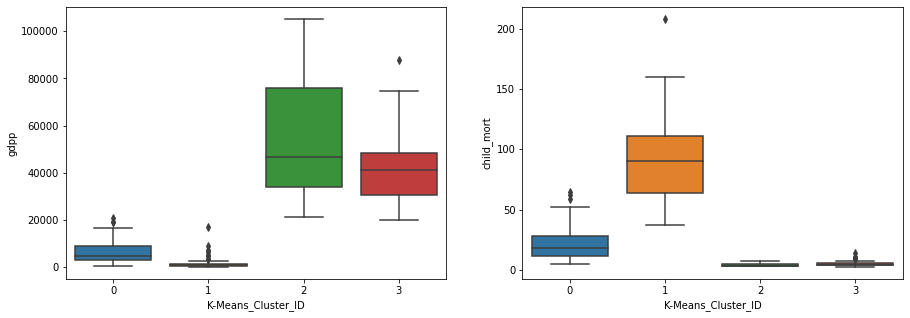

In [48]:
kmeans = KMeans(n_clusters=4, random_state=1)
kmeans.fit(pca)
df['K-Means_Cluster_ID'] = kmeans.labels_

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

sns.boxplot(ax=axes[0], x='K-Means_Cluster_ID', y='gdpp', data=df);

sns.boxplot(ax=axes[1], x='K-Means_Cluster_ID', y='child_mort', data=df);

##Задание 7.9

Итак, мы понимаем, что именно в выбранном нами кластере находятся страны, которые особенно остро нуждаются в финансовой помощи. Однако на все страны у нас не хватит ресурсов, поэтому давайте выберем из выделенного кластера три страны, в которых самая маленькая продолжительность жизни.

In [51]:
K_Means_countries = df[df['K-Means_Cluster_ID'] == 1]
K_Means_countries.sort_values(by = 'life_expec')[:3]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,K-Means_Cluster_ID
66,Haiti,208.0,15.3,6.91,64.7,1500,5.45,32.1,3.33,662,1
87,Lesotho,99.7,39.4,11.10,101.0,2380,4.15,46.5,3.30,1170,1
31,Central African Republic,149.0,11.8,3.98,26.5,888,2.01,47.5,5.21,446,1
